# Introduction
In this notebook i will be doing an **Exploratory Data Analysis** on the [Top Hits Spotify from 2000-2019 Dataset](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019).

For better understanding, here are the descriptions of each column in this dataset:

* artist: Name of the Artist.
* song: Name of the Track.
* duration_ms: Duration of the track in milliseconds.
* explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
* year: Release Year of the track.
* popularity: The higher the value the more popular the song is.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* genre: Genre of the track.

With that said, let's proceed to the analysis.

# Import packages

Let's begin by importing some packages and initializing some variables.

In [1]:
#Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

# Seaborn theme
sns.set_theme(style="darkgrid")

# Importing the data
Import the dataset and explore its content.

In [2]:
# Read csv
df = pd.read_csv("../input/top-hits-spotify-from-20002019/songs_normalize.csv")
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


# Preprocessing data
We don't have any null value.

However, the dataset has songs from *1999*, but its title says "from 
2000-2019", so we can *drop* songs not fitting in that range.

Also we can convert the songs **duration** to *seconds* for better readibilty.

In [4]:
# PREPROCESSING
#Drop songs before 2000 and after 2019
df = df[(df.year >= 2000) & (df.year <= 2019)]

#Transform duration_ms to durations_s
df["duration_s"] = df.duration_ms.apply(lambda x : round(x/1000))
df.drop("duration_ms", axis=1, inplace=True)
#See results
df.head()

,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,Britney Spears,Oops!...I Did It Again,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,211
3,Bon Jovi,It's My Life,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",224
4,*NSYNC,Bye Bye Bye,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,201
6,Eminem,The Real Slim Shady,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop,284
7,Robbie Williams,Rock DJ,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock",259


# Analyzing data
Now let´s find the 5 *longest* and *shortest* top hits:

In [5]:
#Top 5 longest and shortest songs
songs_by_duration = df.sort_values("duration_s", ascending=False)[["song", "artist", "duration_s"]]
#Longest songs
songs_by_duration[:5]

,song,artist,duration_s
1381,Mirrors,Justin Timberlake,484
140,Another Chance,Roger Sanchez,453
706,What Goes Around.../...Comes Around (Interlude),Justin Timberlake,449
760,LoveStoned / I Think She Knows (Interlude),Justin Timberlake,444
242,Days Go By,Dirty Vegas,432


In [6]:
#Shortest songs
songs_by_duration[-5:]

,song,artist,duration_s
1746,Gucci Gang,Lil Pump,124
1853,changes,XXXTENTACION,122
1752,Jocelyn Flores,XXXTENTACION,119
1939,Panini,Lil Nas X,115
1931,Old Town Road,Lil Nas X,113


Some artists appear more than once in this tops: **Justin Timberlake** in Longests Top Hits and **XXXTENTACION** and **Lil Nas X** in Shortest ones.

# Top Hits by Year

Now let's explore the number of top hits released by **year**.

(array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

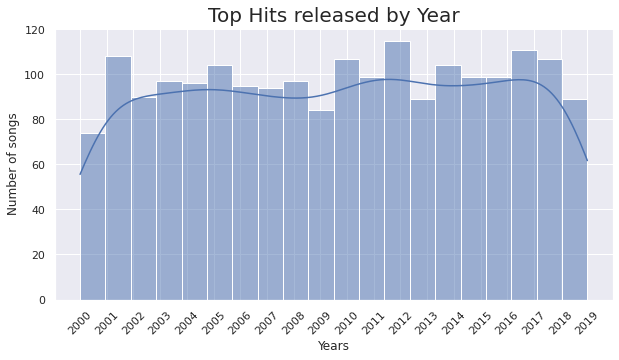

In [7]:
#Top Hits by Year
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.histplot(x="year", data=df, kde=True, bins=20)
ax.set_title("Top Hits released by Year", fontsize=20)
ax.set_ylabel("Number of songs")
ax.set_xlabel("Years")
ax.set_xticks(range(2000, 2020, 1)) #Show all years
plt.xticks(rotation=45) #Avoid overlapping years

We can notice that the **number of Top Hits** is *decreasing* since 2017.

# Top Hits Durations

Let's explore the variance of Top Hits **Durations** by Year.

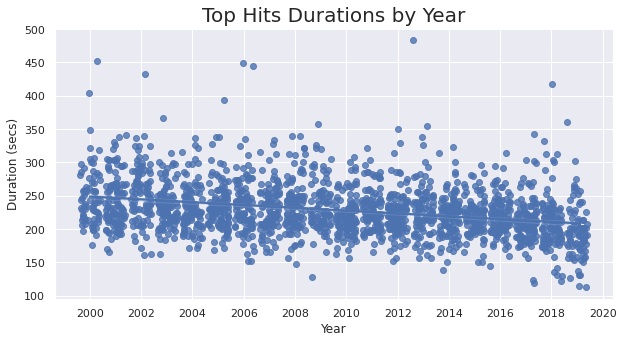

In [8]:
# Year vs duration_s
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.regplot(x="year", y="duration_s", data=df, x_jitter=.4)
ax.set_title("Top Hits Durations by Year", fontsize=20)
ax.set_ylabel("Duration (secs)")
ax.set_xlabel("Year")
ax.set_xticks(np.arange(2000, 2021, 2))

It seems like the **Average Duration** of Top Hits has been *decreasing slowly* across this two decades.

# Explicit content

Let's see now the *number of Top Hits* with **Explicit** content.

Text(0.5, 0, 'Explicit?')

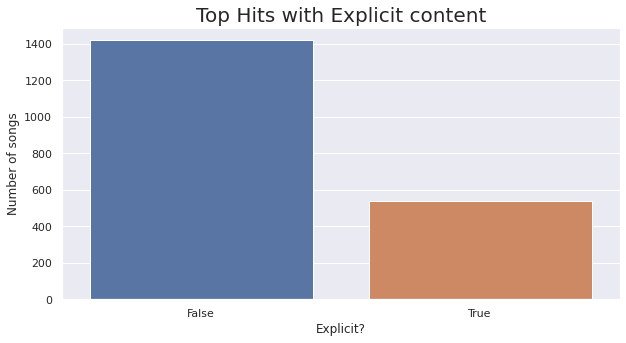

In [9]:
#Countplot of explicit songs
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.countplot(x="explicit", data=df)
ax.set_title("Top Hits with Explicit content", fontsize=20)
ax.set_ylabel("Number of songs")
ax.set_xlabel("Explicit?")

Almost one third of Top Hits songs have **Explicit** content! Later we'll see the distribution of this feature across genres.

# Keys and Mode

Let's take a look on the **Key** and **Mode** distribution.

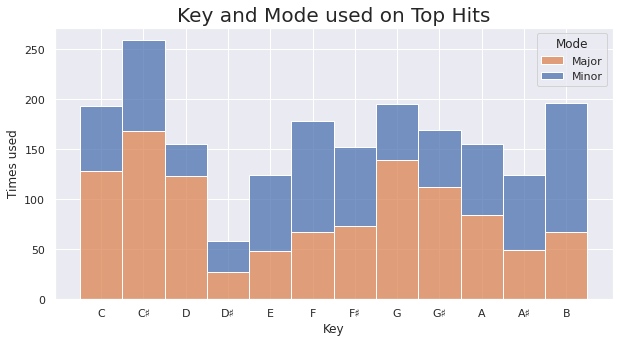

In [10]:
#Key and mode distribution
key_names = 'C C♯ D D♯ E F F♯ G G♯ A A♯ B'.split()
key_values = np.arange(0, 12, 1)
key_map = dict(zip(key_values, key_names))
df["key_name"] = df["key"].map(key_map)
df["key_name"] = pd.Categorical(df["key_name"], key_names)
#Plot
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.histplot(x="key_name", hue="mode", multiple="stack",
                  data=df, legend=False)
ax.set_title("Key and Mode used on Top Hits", fontsize=20)
ax.set_ylabel("Times used")
ax.set_xlabel("Key")
ax.set_xticks(key_names)
plt.legend(title='Mode', labels=['Major', 'Minor'])

It seems like the most used **Key** on Top Hits is *C#*. The most used Key for **Major Mode** is also *C#*, and the one for **Minor Mode** is *B*.

# Artists

Now let's explore the **Artists**, we can *build a dataframe* with the important information we want to analyze.

In [11]:
#Craft the dataframe "artists"
popByArtist = df.groupby("artist").popularity.mean().reset_index()
songsByArtist = df.groupby("artist").size().reset_index()
artists = popByArtist.merge(songsByArtist, on="artist")
artists.columns = ["artist", "popularity", "songs"]
#See the results
artists.head()

,artist,popularity,songs
0,*NSYNC,55.0,4
1,112,60.0,2
2,2 Chainz,70.0,2
3,21 Savage,76.0,2
4,2Pac,62.5,2


With that done, we can now compare the **Average Popularity** and **Number of Songs** of **Artists**.

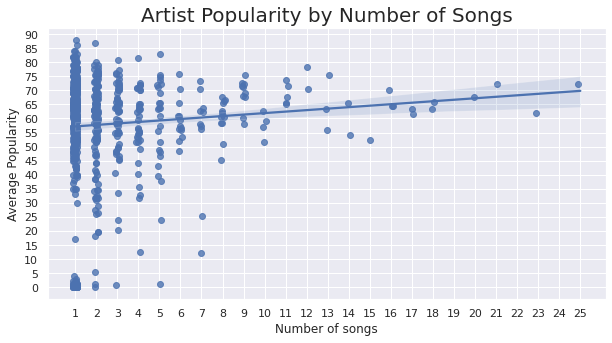

In [12]:
#Regression plot popularity vs songs
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.regplot(y="popularity", x="songs", data=artists, x_jitter=0.1)
ax.set_title("Artist Popularity by Number of Songs", fontsize=20)
ax.set_xlabel("Number of songs")
ax.set_xticks(np.arange(1, 26, 1))
ax.set_ylabel("Average Popularity")
ax.set_yticks(np.arange(0, 91, 5))

We can notice a *little positive correlation* between both variables, it seems like **Artists** with *more songs* tend to be a *little more popular*.

However, the **Artists** with more **Average Popularity** only have 1 or 2 Top Hits! To be fair let's have in account only **Artists** with 3 or more Top Hits.

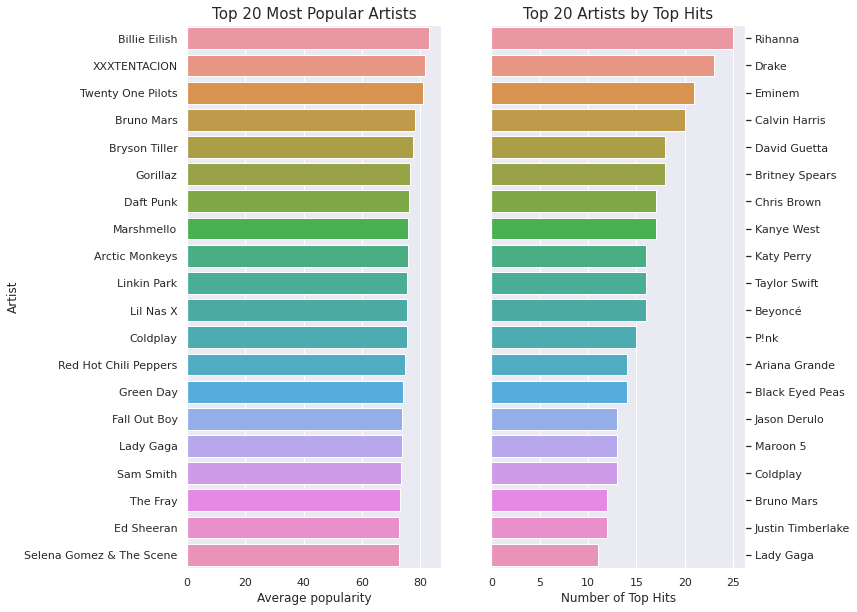

In [13]:
#Top 20 Artists (with 3 or more Top Hits) by average popularity
validArtists = artists[artists.songs >= 3]
plt.rcParams["figure.figsize"] = (10,5)
#Plot both graphs
fig, axes = plt.subplots(1, 2, figsize=(10,10))
ax0 = sns.barplot(y="artist", x="popularity", ax=axes[0],
                  data=validArtists.sort_values("popularity", ascending=False)[:20])
ax1 = sns.barplot(y="artist", x="songs", ax=axes[1],
                  data=validArtists.sort_values("songs", ascending=False)[:20])
ax0.set_title("Top 20 Most Popular Artists", fontsize=15)
ax0.set_xlabel("Average popularity")
ax0.set_ylabel("Artist")
ax1.set_title("Top 20 Artists by Top Hits", fontsize=15)
ax1.set_xlabel("Number of Top Hits")
ax1.set_ylabel("")
ax1.yaxis.tick_right()

There are **Artists** with really *a lot of Top Hits* in this two decades, while the *Top 20 most popular Artists* are pretty even.

We can see Artists both *popular* and *with many Top Hits* like: **Lady Gaga**, **Coldplay** and **Bruno Mars**.

# Genres
Let's now explore the **Genre** column, we need to *explode* it in order to group by genre.

Then we can craft a "genres" DataFrame like we did with Artists.

In [14]:
# Explode the genre column
df.genre = df.genre.apply(lambda x: x.split(", "))
df_genre_exp = df.explode("genre")

# Craft "genres" DataFrame
genre_cols = df_genre_exp.columns.values[4:-1] #From popularity to duration_s
genre_cols = np.append(genre_cols, ["explicit"])
genres = df_genre_exp.groupby("genre")[genre_cols].mean().reset_index()
#See results
genres.head()

,genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,explicit
0,Dance/Electronic,54.966408,0.666744,0.766687,5.754522,-5.151388,0.506460,0.079919,0.110175,0.037666,0.182850,0.537117,124.054483,215.832041,0.118863
1,Folk/Acoustic,59.947368,0.555105,0.720789,4.421053,-6.480842,0.789474,0.042058,0.199999,0.045545,0.193379,0.560684,109.683263,220.736842,0.052632
2,R&B,58.629797,0.689108,0.663233,5.331828,-5.879093,0.523702,0.114886,0.150546,0.006579,0.162687,0.562708,115.507377,239.054176,0.275395
3,World/Traditional,53.444444,0.577111,0.692889,4.222222,-6.354889,0.666667,0.078433,0.260068,0.220410,0.204456,0.641667,111.259889,216.888889,0.000000
4,blues,38.666667,0.607333,0.692667,5.000000,-5.511667,0.333333,0.080533,0.014537,0.149010,0.216667,0.434000,131.272667,238.666667,0.000000


# Popularity by Genre
Now let's find the **Most Popular Genre**!

Text(0.5, 0, 'Average popularity')

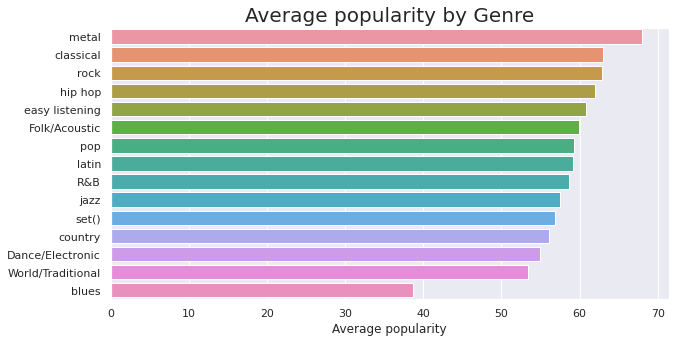

In [15]:
# Popularity by genres
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(x="popularity", y="genre",
                  data=genres.sort_values("popularity", ascending=False))
ax.set_title("Average popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Average popularity")

That's pretty interesting... maybe it would be a better idea to plot the **distribution** of Songs Popularity for each Genre to have a better understanding of this result.

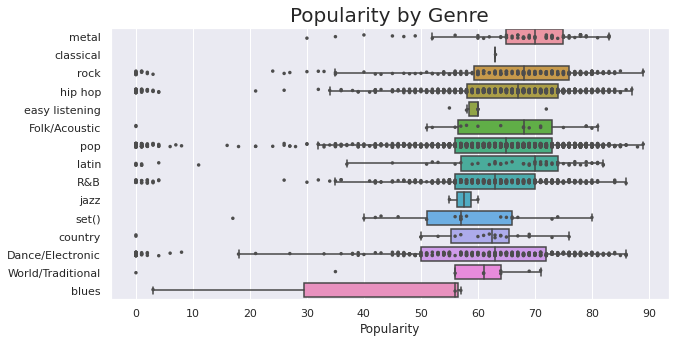

In [16]:
# BOXPLOT + STRIPPLOT of Popularity for each Genre
plt.rcParams["figure.figsize"] = (10,5)
order = df_genre_exp.groupby("genre")["popularity"].mean().sort_values(ascending=False).index.values
ax = sns.boxplot(x="popularity", y="genre", data=df_genre_exp,
                  order=order, fliersize=0)
sns.stripplot(x="popularity", y="genre", data=df_genre_exp,
              order=order, color=".3", size=3.5)
ax.set_title("Popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Popularity")
ax.set_xticks(np.arange(0, 91, 10))

* The genres are ordered by **Average** Popularity from top to bottom. We can see that **Metal** indeed has the *best Average Popularity* and *the best distribution*.

* **Classical** is the *2nd more popular genre*, but thanks to this plot we can see there is *only one Classical Top Hit* in this dataset, so we can ignore it.

* We can also notice that other Genres like **Rock**, **Hip Hop**, **Pop**, **R&B** and **Electronic** have *more popular songs* than Metal, but *worst distribution* due to the large amount of songs. They also have the *least popular songs*.

* We also can see that Genres like "**easy listening**", **Blues** and **Jazz** has too few songs in this dataset.

# Features correlation
Let's now explore the Top Hits **Features** and the *relation* between them.

<AxesSubplot:>

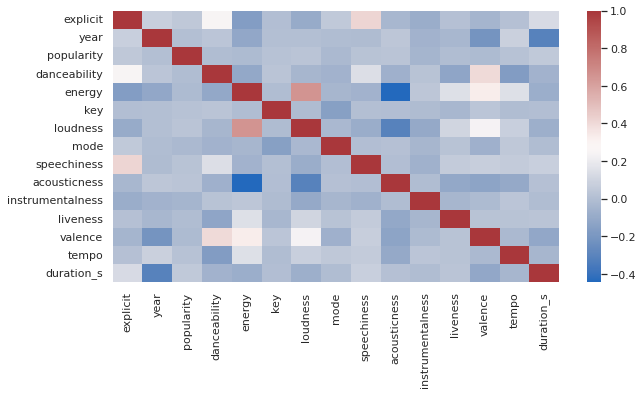

In [17]:
# Correlation between features
features = df.drop(["artist", "song"], axis=1)
corr = features.corr()
#Heatmap
sns.heatmap(corr, cmap="vlag")

* The *strongest positive correlation* is between **Loudness** and **Energy**. (The louder the song, the more energy it has).
* The *strongest negative correlation* is between **Acousticness** and **Energy**. (The more acoustic the song, the less energy it has).
* We can see a *little positive correlation* between **Speechiness** and **Explicit**. We'll see this makes more sense specially in the *Hip Hop Genre*.
* There is a *little negative correlation* between **Duration** and **Year**, we saw this relation before in a *Regression Plot*.
* There is a *little positive correlation* between **Valence** and **Danceability**. (Happier/positive songs tend to be more danceable).

# Features by Genre
Let's see which are the *most important features* for each **Genre**.

We are only going to consider the features that vary between 0 and 1 to be able to compare them better.

Let's also exclude the Genres "**Classical**" (only 1 song) and "**set()**"(not a genre, i think).

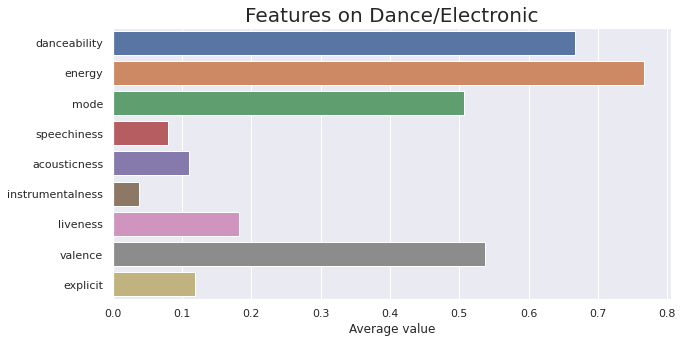

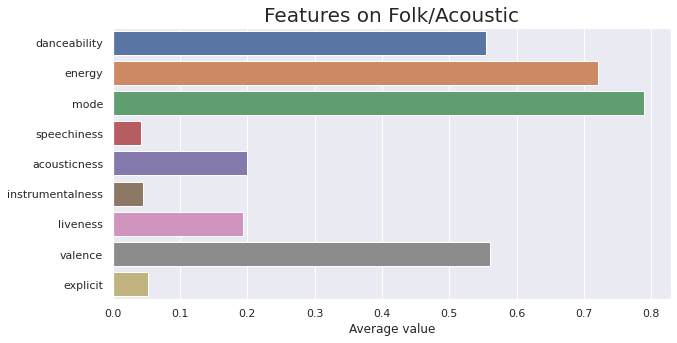

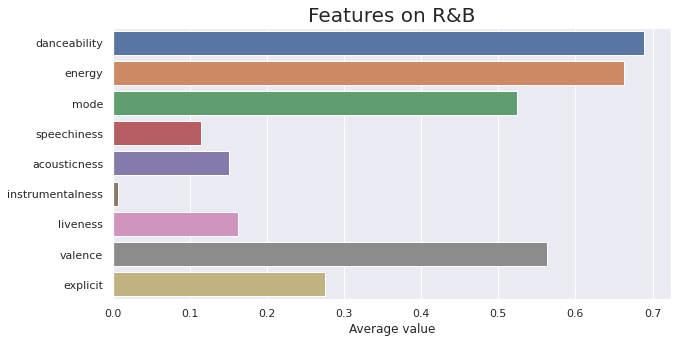

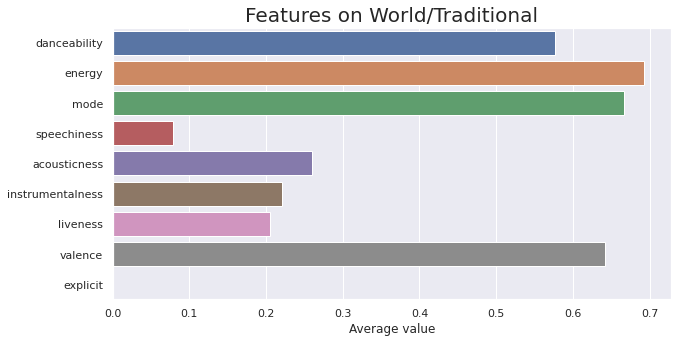

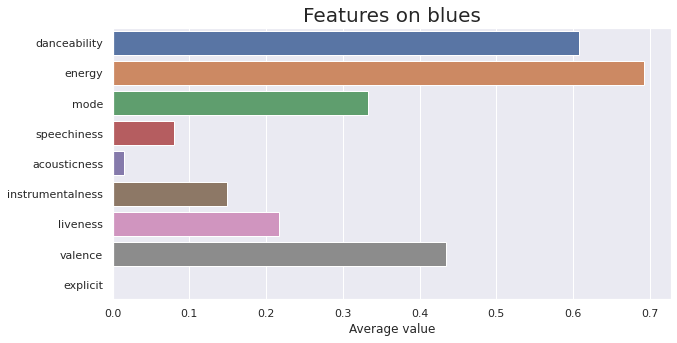

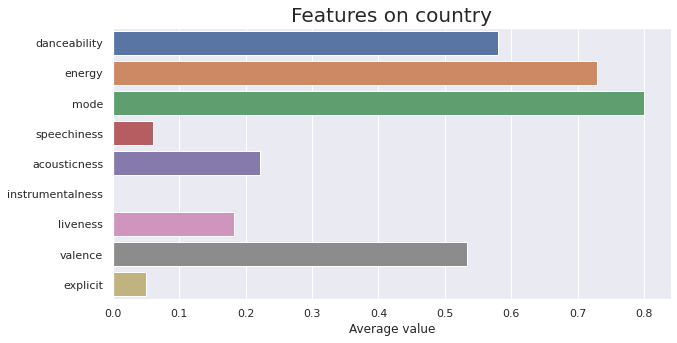

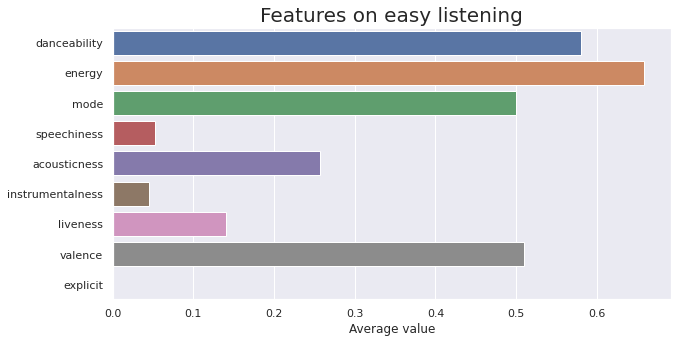

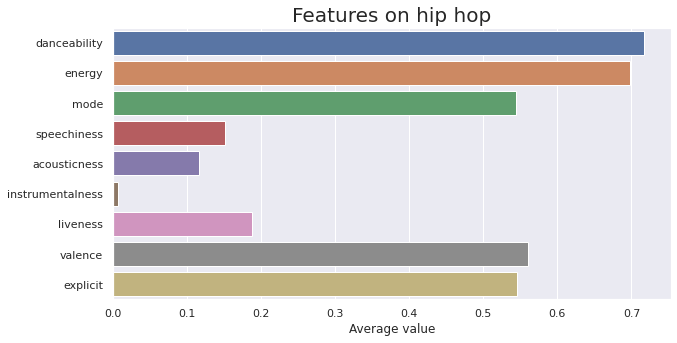

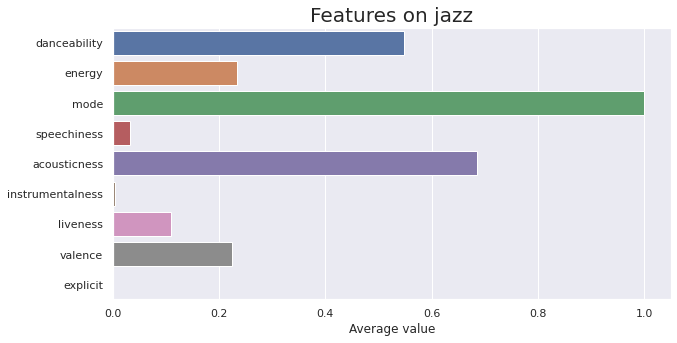

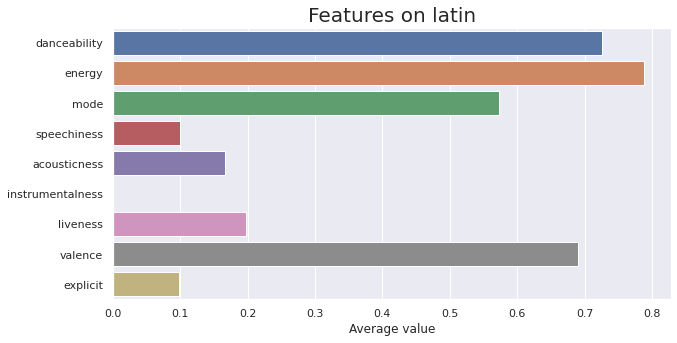

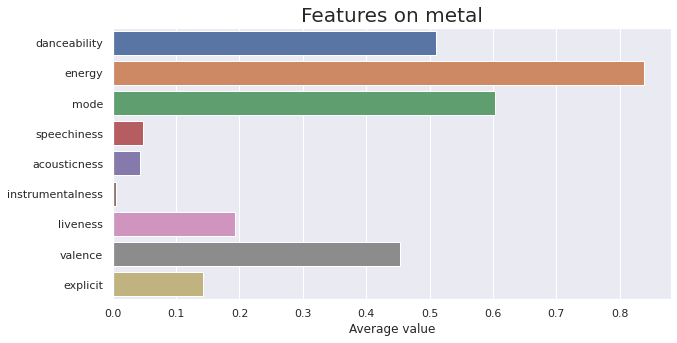

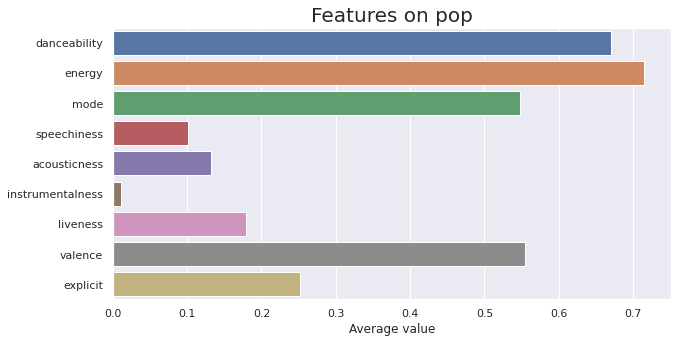

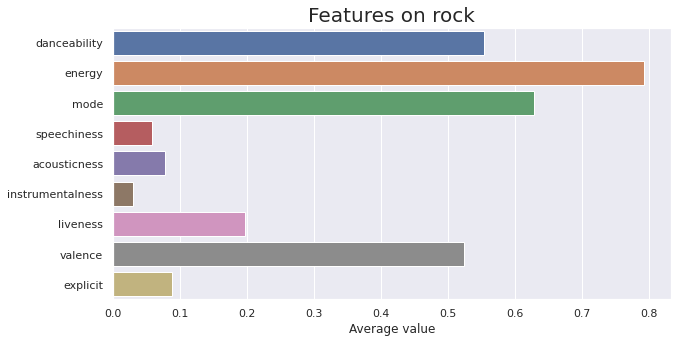

In [18]:
#Average features by genre
#Exclude "classical" and "set()"
genre_num_songs = df_genre_exp.groupby("genre").size().reset_index()
genre_num_songs.columns = ["genre", "songs"]
genre_num_songs.drop(genre_num_songs[genre_num_songs.genre.isin(["classical", "set()"])].index.values, inplace=True)
valid_genres = genre_num_songs.genre.values
#Iterate for each genre
for genre in valid_genres:
    data = genres.drop(["popularity"], axis=1)[genres.genre == genre]
    #Exclude features with different scales
    data = data.drop(["genre", "tempo",
                      "duration_s", "key", "loudness"], axis=1).transpose().reset_index()
    data.columns = ["feature", "value"]
    #Visualize average values for features on each genre
    plt.clf()
    ax = sns.barplot(x="value", y="feature", data=data)
    ax.set_xlabel("Average value")
    ax.set_ylabel("")
    ax.set_title("Features on " + genre, fontsize=20)
    plt.show()

# Conclusions
* The **Hip Hop** Genre has the *higher values* of **Explicit** (by far) and **Speechiness**, which make sense.
* **Jazz** has the *higher value* of **Acousticness** of all genres, and also all the Jazz songs in this datasets are in **Major mode** (*Average mode*=1.0).
* **Jazz** has the *lower values* of **Energy** (by far) and **Valence**, that is, their songs tend to be more calm and "negative".
* **Blues** and **World/Traditional** have the higher values of **Instrumentalness**.
* The genre **Blues** is the *only one* that has more Top Hits in **Minor mode** (*Average mode* < 0.5).
* Finally, there is a *CLEAR tendence* in the majority of these genres: *Really high values* on **Danceability**, **Energy**, **Mode** and **Valence**. Maybe the easiest way to compose a Top Hit is a *positive/danceable/intense* song in *Major Mode*?